# **Rain in Australia**
In this project, we analyze a dataset containing information about daily weather observations from many location across Australia. The goal of any machine learning algorithm trained on this dataset is to predict whether it's going to rain during the next day, given information about certain parameters collected during the current day (and, possibly, the previous ones).

*Authors: Petrillo Daniele, Zampella Maria*

In [ ]:
import pandas as pd #for managing the dataset
from prettytable import PrettyTable #for building table
import numpy as np
from sklearn.impute import SimpleImputer #for substitute the nan with the mean
from sklearn.compose import ColumnTransformer # for transofrming the categorial variables
from sklearn.model_selection import train_test_split # for splitting the dataset
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import learning_curve
#from sklearn.ensemble import MajorityClassifier

from sklearn.feature_selection import VarianceThreshold,SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.linear_model import LogisticRegression, Perceptron

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold , KFold, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score,precision_score,recall_score , f1_score,confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


## **Dataset**

This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

In [ ]:
dataset = pd.read_csv("gdrive/MyDrive/mlxp/weatherAUS.csv")
dataset

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
# This are the statistics for the numerical variables 
dataset.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [ ]:
# This are the statistics for the categorical variables
dataset.describe(include = 'object')

Date  Location WindGustDir WindDir9am WindDir3pm RainToday  \
count       145460    145460      135134     134894     141232    142199   
unique        3436        49          16         16         16         2   
top     2013-11-12  Canberra           W          N         SE        No   
freq            49      3436        9915      11758      10838    110319   

       RainTomorrow  
count        142193  
unique            2  
top              No  
freq         110316

In [ ]:
print(dataset.columns, '\n', dataset.shape)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object') 
 (145460, 23)


## **Preprocessing phase**

In this phase we deal with missing data, both numerical and categorical; the values will be imputed based respectively on average and most frequent value, grouped by Location

### **Missing data**

Firstly, let's see the number of Null values for each columns

In [ ]:
columns = dataset.columns
myTable = PrettyTable(['Column','N° of Nan', '% of Nan'])

for i in columns:
  myTable.add_row([i, dataset[i].isnull().sum(), round((dataset[i].isnull().sum())*100/dataset.shape[0],2)])

print(myTable)

+---------------+-----------+----------+
|     Column    | N° of Nan | % of Nan |
+---------------+-----------+----------+
|      Date     |     0     |   0.0    |
|    Location   |     0     |   0.0    |
|    MinTemp    |    1485   |   1.02   |
|    MaxTemp    |    1261   |   0.87   |
|    Rainfall   |    3261   |   2.24   |
|  Evaporation  |   62790   |  43.17   |
|    Sunshine   |   69835   |  48.01   |
|  WindGustDir  |   10326   |   7.1    |
| WindGustSpeed |   10263   |   7.06   |
|   WindDir9am  |   10566   |   7.26   |
|   WindDir3pm  |    4228   |   2.91   |
|  WindSpeed9am |    1767   |   1.21   |
|  WindSpeed3pm |    3062   |   2.11   |
|  Humidity9am  |    2654   |   1.82   |
|  Humidity3pm  |    4507   |   3.1    |
|  Pressure9am  |   15065   |  10.36   |
|  Pressure3pm  |   15028   |  10.33   |
|    Cloud9am   |   55888   |  38.42   |
|    Cloud3pm   |   59358   |  40.81   |
|    Temp9am    |    1767   |   1.21   |
|    Temp3pm    |    3609   |   2.48   |
|   RainToday   

We notice that Evaporation, Sunshine, Cloud9am and Cloud 3pm have an high percentage of NaN values, so, in our opinion, the best choice is to delete these columns. For the other columns which have a lower percentage of Nan values we decide to substitue them with the mean of that column. (If the column is a categorical one, the Nan values will be substituted by the most frequent value.)

In [ ]:
df = dataset.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis=1)

print(dataset.shape, df.shape)

(145460, 23) (145460, 19)


In [ ]:
df.index

RangeIndex(start=0, stop=145460, step=1)

As we can observe from the previous table, there are some observation which does not have a value for RainTomorrow that is the prediction variable- So we decide to remove all these observations.

In [ ]:
#df.drop(df[(df.RainTomorrow != 'No') & (df.RainTomorrow != 'Yes')].index, inplace= True)
df.dropna(subset = ['RainTomorrow'], inplace=True)
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

The variables in the data set contain information about temperature, wind, humidity and other factors that are certainly influenced by the location in which they are collected. So, when the Nan values are substitued by the mean, it is a good idea to take in account the mean calculated by considering only the instances collected in that location.

In [ ]:
# let's see which and how many are the different location

print(df.Location.unique(), '\n' ,len(df.Location.unique()))

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru'] 
 49


#### **Numerical variables**

Now let's focus on numerical variables

In [ ]:
# We want to calculate the mean for each numerical variable, so first let's select the numerical variable.
columns = df.columns 

s = df.dtypes == 'float64'
numerical_col = []
for index in range(len(s)):
  if s[index] == True:
    numerical_col.append(columns[index])
numerical_col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
df[numerical_col]

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0          13.4     22.9       0.6           44.0          20.0          24.0   
1           7.4     25.1       0.0           44.0           4.0          22.0   
2          12.9     25.7       0.0           46.0          19.0          26.0   
3           9.2     28.0       0.0           24.0          11.0           9.0   
4          17.5     32.3       1.0           41.0           7.0          20.0   
...         ...      ...       ...            ...           ...           ...   
145454      3.5     21.8       0.0           31.0          15.0          13.0   
145455      2.8     23.4       0.0           31.0          13.0          11.0   
145456      3.6     25.3       0.0           22.0          13.0           9.0   
145457      5.4     26.9       0.0           37.0           9.0           9.0   
145458      7.8     27.0       0.0           28.0          13.0           7.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  
0              71.0         22.0       1007.7       1007.1     16.9     21.8  
1              44.0         25.0       1010.6       1007.8     17.2     24.3  
2              38.0         30.0       1007.6       1008.7     21.0     23.2  
3              45.0         16.0       1017.6       1012.8     18.1     26.5  
4              82.0         33.0       1010.8       1006.0     17.8     29.7  
...             ...          ...          ...          ...      ...      ...  
145454         59.0         27.0       1024.7       1021.2      9.4     20.9  
145455         51.0         24.0       1024.6       1020.3     10.1     22.4  
145456         56.0         21.0       1023.5       1019.1     10.9     24.5  
145457         53.0         24.0       1021.0       1016.8     12.5     26.1  
145458         51.0         24.0       1019.4       1016.5     15.1     26.0  

[142193 rows x 12 columns]

In [ ]:
# The function nanmean allows us to calculate the mean without considering the Null values

#first we group the dataset depending on Location column
grouped_df = df.groupby(['Location'])

#let's observe just a column od the dataset we have just created
# grouped_df['MinTemp'].describe()
# grouped_df.describe()

#now we need to calculate the mean
mean_df = grouped_df.mean()
mean_df

MinTemp    MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
Location                                                                        
Adelaide          12.628368  22.945402  1.572185      36.530812      9.954295   
Albany            12.948461  20.072587  2.255073            NaN     12.498986   
Albury             9.520899  22.630963  1.925710      32.953016      8.221816   
AliceSprings      13.125182  29.244191  0.869355      40.533714     14.728623   
BadgerysCreek     11.136900  24.023111  2.207925      33.609890      8.047488   
Ballarat           7.355302  18.274794  1.688830      44.978695     19.978477   
Bendigo            8.591065  21.616683  1.621452      38.849283     12.934675   
Brisbane          16.410998  26.441527  3.160536      28.211380      6.950965   
Cairns            21.199197  29.544344  5.765317      38.067991     15.926372   
Canberra           6.827688  20.980644  1.735038      40.082174     10.415987   
Cobar             13.120342  25.834081  1.129262      36.728814     14.636516   
CoffsHarbour      14.365774  23.915575  5.054592      39.232197     15.268220   
Dartmoor           8.619816  19.694427  2.148554      38.896904     10.821429   
Darwin            23.210530  32.540977  5.094048      40.582355     15.009718   
GoldCoast         17.341490  25.752971  3.728933      42.472539     19.339783   
Hobart             9.079141  17.866677  1.604273      47.531398     16.309912   
Katherine         20.534983  34.939037  3.135599      38.758328     12.131579   
Launceston         7.833818  18.956231  2.012219      35.630877      8.460165   
Melbourne         11.788127  20.860148  1.837772      45.425444     19.043157   
MelbourneAirport   9.973945  20.491858  1.451977      46.919172     20.278923   
Mildura           10.733954  24.841536  0.945025      37.170829     14.000666   
Moree             12.786255  26.886861  1.603296      39.799425     18.024512   
MountGambier       8.827468  19.828128  2.087359      42.869099     17.521667   
MountGinini        3.651193  11.777947  3.245241      46.188214     15.922178   
Newcastle         13.740240  24.098283  3.153022            NaN      5.985150   
Nhil               8.992798  22.398407  0.932907      42.542438     16.443595   
NorahHead         15.375197  22.607900  3.382479      42.215043     13.912775   
NorfolkIsland     16.839960  21.792746  3.137568      42.639973     20.168471   
Nuriootpa          9.366433  21.714658  1.381375      40.660720     14.237345   
PearceRAAF        12.386314  26.271049  1.634354      43.448549     16.029872   
Penrith           12.533649  24.731984  2.135143      31.794386      6.343878   
Perth             12.922706  25.034837  1.906295      34.882999     10.693392   
PerthAirport      12.580359  25.533234  1.761648      44.201822     17.753575   
Portland           9.585537  18.055626  2.531032      42.058883     16.322979   
Richmond          11.346070  24.449813  2.152581      34.860354      7.018499   
Sale               8.561220  20.271024  1.512667      42.474529     14.286620   
SalmonGums         9.302578  24.249204  1.032302      39.761086     16.286399   
Sydney            14.865057  23.002339  3.330231      41.761408     15.070674   
SydneyAirport     14.894041  23.378902  2.995335      47.222072     18.591606   
Townsville        20.411250  29.362974  3.488603      38.804052     15.224018   
Tuggeranong        7.245612  20.777444  2.159040      35.189615      7.637647   
Uluru             14.406983  30.387442  0.707324      41.369231     17.642809   
WaggaWagga         9.562030  22.961290  1.706085      36.566147     12.867272   
Walpole           11.915711  20.566821  2.877329      39.753051     13.883754   
Watsonia          10.126228  20.883528  1.847692      38.057297      9.922307   
Williamtown       12.820376  24.147020  3.510985      41.753695     16.496848   
Witchcliffe       10.756861  21.699423  2.899658      39.980259     13.934510   
Wollongong        14.949058  21.476510  3.589127   

In [ ]:
# We noticed that there were some NaN values in the dataset containing the mean. For observing whats is happening we print the Pressure9am column 
# for the istances collected in the location Newcastle and we noticed that all the instances where NaN.

print(df['Pressure9am'].loc[df['Location'] == 'Newcastle'])

print('The number of Null values is :', df['Pressure9am'].loc[df['Location'] == 'Newcastle'].isnull().sum())

15076   NaN
15077   NaN
15078   NaN
15079   NaN
15080   NaN
         ..
18110   NaN
18111   NaN
18112   NaN
18113   NaN
18114   NaN
Name: Pressure9am, Length: 2955, dtype: float64
The number of Null values is : 2955


In [ ]:
# Let's see which are the element that contains all Null element.

null_city = []
cols = mean_df.columns
for i in mean_df.index:
  for col in cols:
    if math.isnan(mean_df.loc[i][col]):
      print(i,col)
      if i not in null_city:
        null_city.append(i)
null_city

Albany WindGustSpeed
MountGinini Pressure9am
MountGinini Pressure3pm
Newcastle WindGustSpeed
Newcastle Pressure9am
Newcastle Pressure3pm
Penrith Pressure9am
Penrith Pressure3pm
SalmonGums Pressure9am
SalmonGums Pressure3pm


['Albany', 'MountGinini', 'Newcastle', 'Penrith', 'SalmonGums']

In [ ]:
# The only possibility for this combination of location and feature is to delete all the instances.
for city in null_city:
  df.drop(df[df['Location'] == city].index, inplace = True) 
print(df.Location.unique(), '\n' ,len(df.Location.unique()))

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'NorahHead'
 'NorfolkIsland' 'Richmond' 'Sydney' 'SydneyAirport' 'WaggaWagga'
 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong' 'Ballarat' 'Bendigo'
 'Sale' 'MelbourneAirport' 'Melbourne' 'Mildura' 'Nhil' 'Portland'
 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns' 'GoldCoast' 'Townsville'
 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera' 'Witchcliffe'
 'PearceRAAF' 'PerthAirport' 'Perth' 'Walpole' 'Hobart' 'Launceston'
 'AliceSprings' 'Darwin' 'Katherine' 'Uluru'] 
 44


In [ ]:
# Now we need to substitute all the Null values with the respective mean.
df.isnull().sum()

Date                0
Location            0
MinTemp           218
MaxTemp           112
Rainfall         1202
WindGustDir      3114
WindGustSpeed    3054
WindDir9am       7621
WindDir3pm       1488
WindSpeed9am      866
WindSpeed3pm      829
Humidity9am      1092
Humidity3pm      1734
Pressure9am      2208
Pressure3pm      2176
Temp9am           310
Temp3pm           924
RainToday        1202
RainTomorrow        0
dtype: int64

In [ ]:
df = df.reset_index(drop=True)
df

Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  \
0       2008-12-01   Albury     13.4     22.9       0.6           W   
1       2008-12-02   Albury      7.4     25.1       0.0         WNW   
2       2008-12-03   Albury     12.9     25.7       0.0         WSW   
3       2008-12-04   Albury      9.2     28.0       0.0          NE   
4       2008-12-05   Albury     17.5     32.3       1.0           W   
...            ...      ...      ...      ...       ...         ...   
127391  2017-06-20    Uluru      3.5     21.8       0.0           E   
127392  2017-06-21    Uluru      2.8     23.4       0.0           E   
127393  2017-06-22    Uluru      3.6     25.3       0.0         NNW   
127394  2017-06-23    Uluru      5.4     26.9       0.0           N   
127395  2017-06-24    Uluru      7.8     27.0       0.0          SE   

        WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0                44.0          W        WNW          20.0          24.0   
1                44.0        NNW        WSW           4.0          22.0   
2                46.0          W        WSW          19.0          26.0   
3                24.0         SE          E          11.0           9.0   
4                41.0        ENE         NW           7.0          20.0   
...               ...        ...        ...           ...           ...   
127391           31.0        ESE          E          15.0          13.0   
127392           31.0         SE        ENE          13.0          11.0   
127393           22.0         SE          N          13.0           9.0   
127394           37.0         SE        WNW           9.0           9.0   
127395           28.0        SSE          N          13.0           7.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
0              71.0         22.0       1007.7       1007.1     16.9     21.8   
1              44.0         25.0       1010.6       1007.8     17.2     24.3   
2              38.0         30.0       1007.6       1008.7     21.0     23.2   
3              45.0         16.0       1017.6       1012.8     18.1     26.5   
4              82.0         33.0       1010.8       1006.0     17.8     29.7   
...             ...          ...          ...          ...      ...      ...   
127391         59.0         27.0       1024.7       1021.2      9.4     20.9   
127392         51.0         24.0       1024.6       1020.3     10.1     22.4   
127393         56.0         21.0       1023.5       1019.1     10.9     24.5   
127394         53.0         24.0       1021.0       1016.8     12.5     26.1   
127395         51.0         24.0       1019.4       1016.5     15.1     26.0   

       RainToday RainTomorrow  
0             No           No  
1             No           No  
2             No           No  
3             No           No  
4             No           No  
...          ...          ...  
127391        No           No  
127392        No           No  
127393        No           No  
127394        No           No  
127395        No           No  

[127396 rows x 19 columns]

In [ ]:
# with this code we group rows by location, then calculate the average
# of each feature for that location, finally we set all missing values
# equal to that average

numerical_col.append('Location')
df_num = df[numerical_col]
numerical_col.remove('Location')

df_num_filled = pd.DataFrame(columns = numerical_col)

imr = SimpleImputer(missing_values=np.nan, strategy='mean')

for location in df.Location.unique():
  dff = df_num[df_num.Location == location] #we want to impute the mean referring to the location.
  dff.drop('Location', axis = 1, inplace = True)

  imr = imr.fit(dff.values)
  dff = imr.transform(dff.values)

  dff= pd.DataFrame(dff, columns = numerical_col)

  df_num_filled = pd.concat([df_num_filled, dff])

df_num_filled.reset_index(drop=True, inplace=True)
df_num_filled

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0          13.4     22.9       0.6           44.0          20.0          24.0   
1           7.4     25.1       0.0           44.0           4.0          22.0   
2          12.9     25.7       0.0           46.0          19.0          26.0   
3           9.2     28.0       0.0           24.0          11.0           9.0   
4          17.5     32.3       1.0           41.0           7.0          20.0   
...         ...      ...       ...            ...           ...           ...   
127391      3.5     21.8       0.0           31.0          15.0          13.0   
127392      2.8     23.4       0.0           31.0          13.0          11.0   
127393      3.6     25.3       0.0           22.0          13.0           9.0   
127394      5.4     26.9       0.0           37.0           9.0           9.0   
127395      7.8     27.0       0.0           28.0          13.0           7.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  
0              71.0         22.0       1007.7       1007.1     16.9     21.8  
1              44.0         25.0       1010.6       1007.8     17.2     24.3  
2              38.0         30.0       1007.6       1008.7     21.0     23.2  
3              45.0         16.0       1017.6       1012.8     18.1     26.5  
4              82.0         33.0       1010.8       1006.0     17.8     29.7  
...             ...          ...          ...          ...      ...      ...  
127391         59.0         27.0       1024.7       1021.2      9.4     20.9  
127392         51.0         24.0       1024.6       1020.3     10.1     22.4  
127393         56.0         21.0       1023.5       1019.1     10.9     24.5  
127394         53.0         24.0       1021.0       1016.8     12.5     26.1  
127395         51.0         24.0       1019.4       1016.5     15.1     26.0  

[127396 rows x 12 columns]

In [ ]:
# df_num_filled è il dataset che contiene solo le variabili numeriche (senza Location) senza nan value
df_num_filled.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
dtype: int64

#### **Correlation of numerical variable**

After having imputed the missing values, we check for correlation of numerical features, to see if some of them may be dropped for being strongly correlated

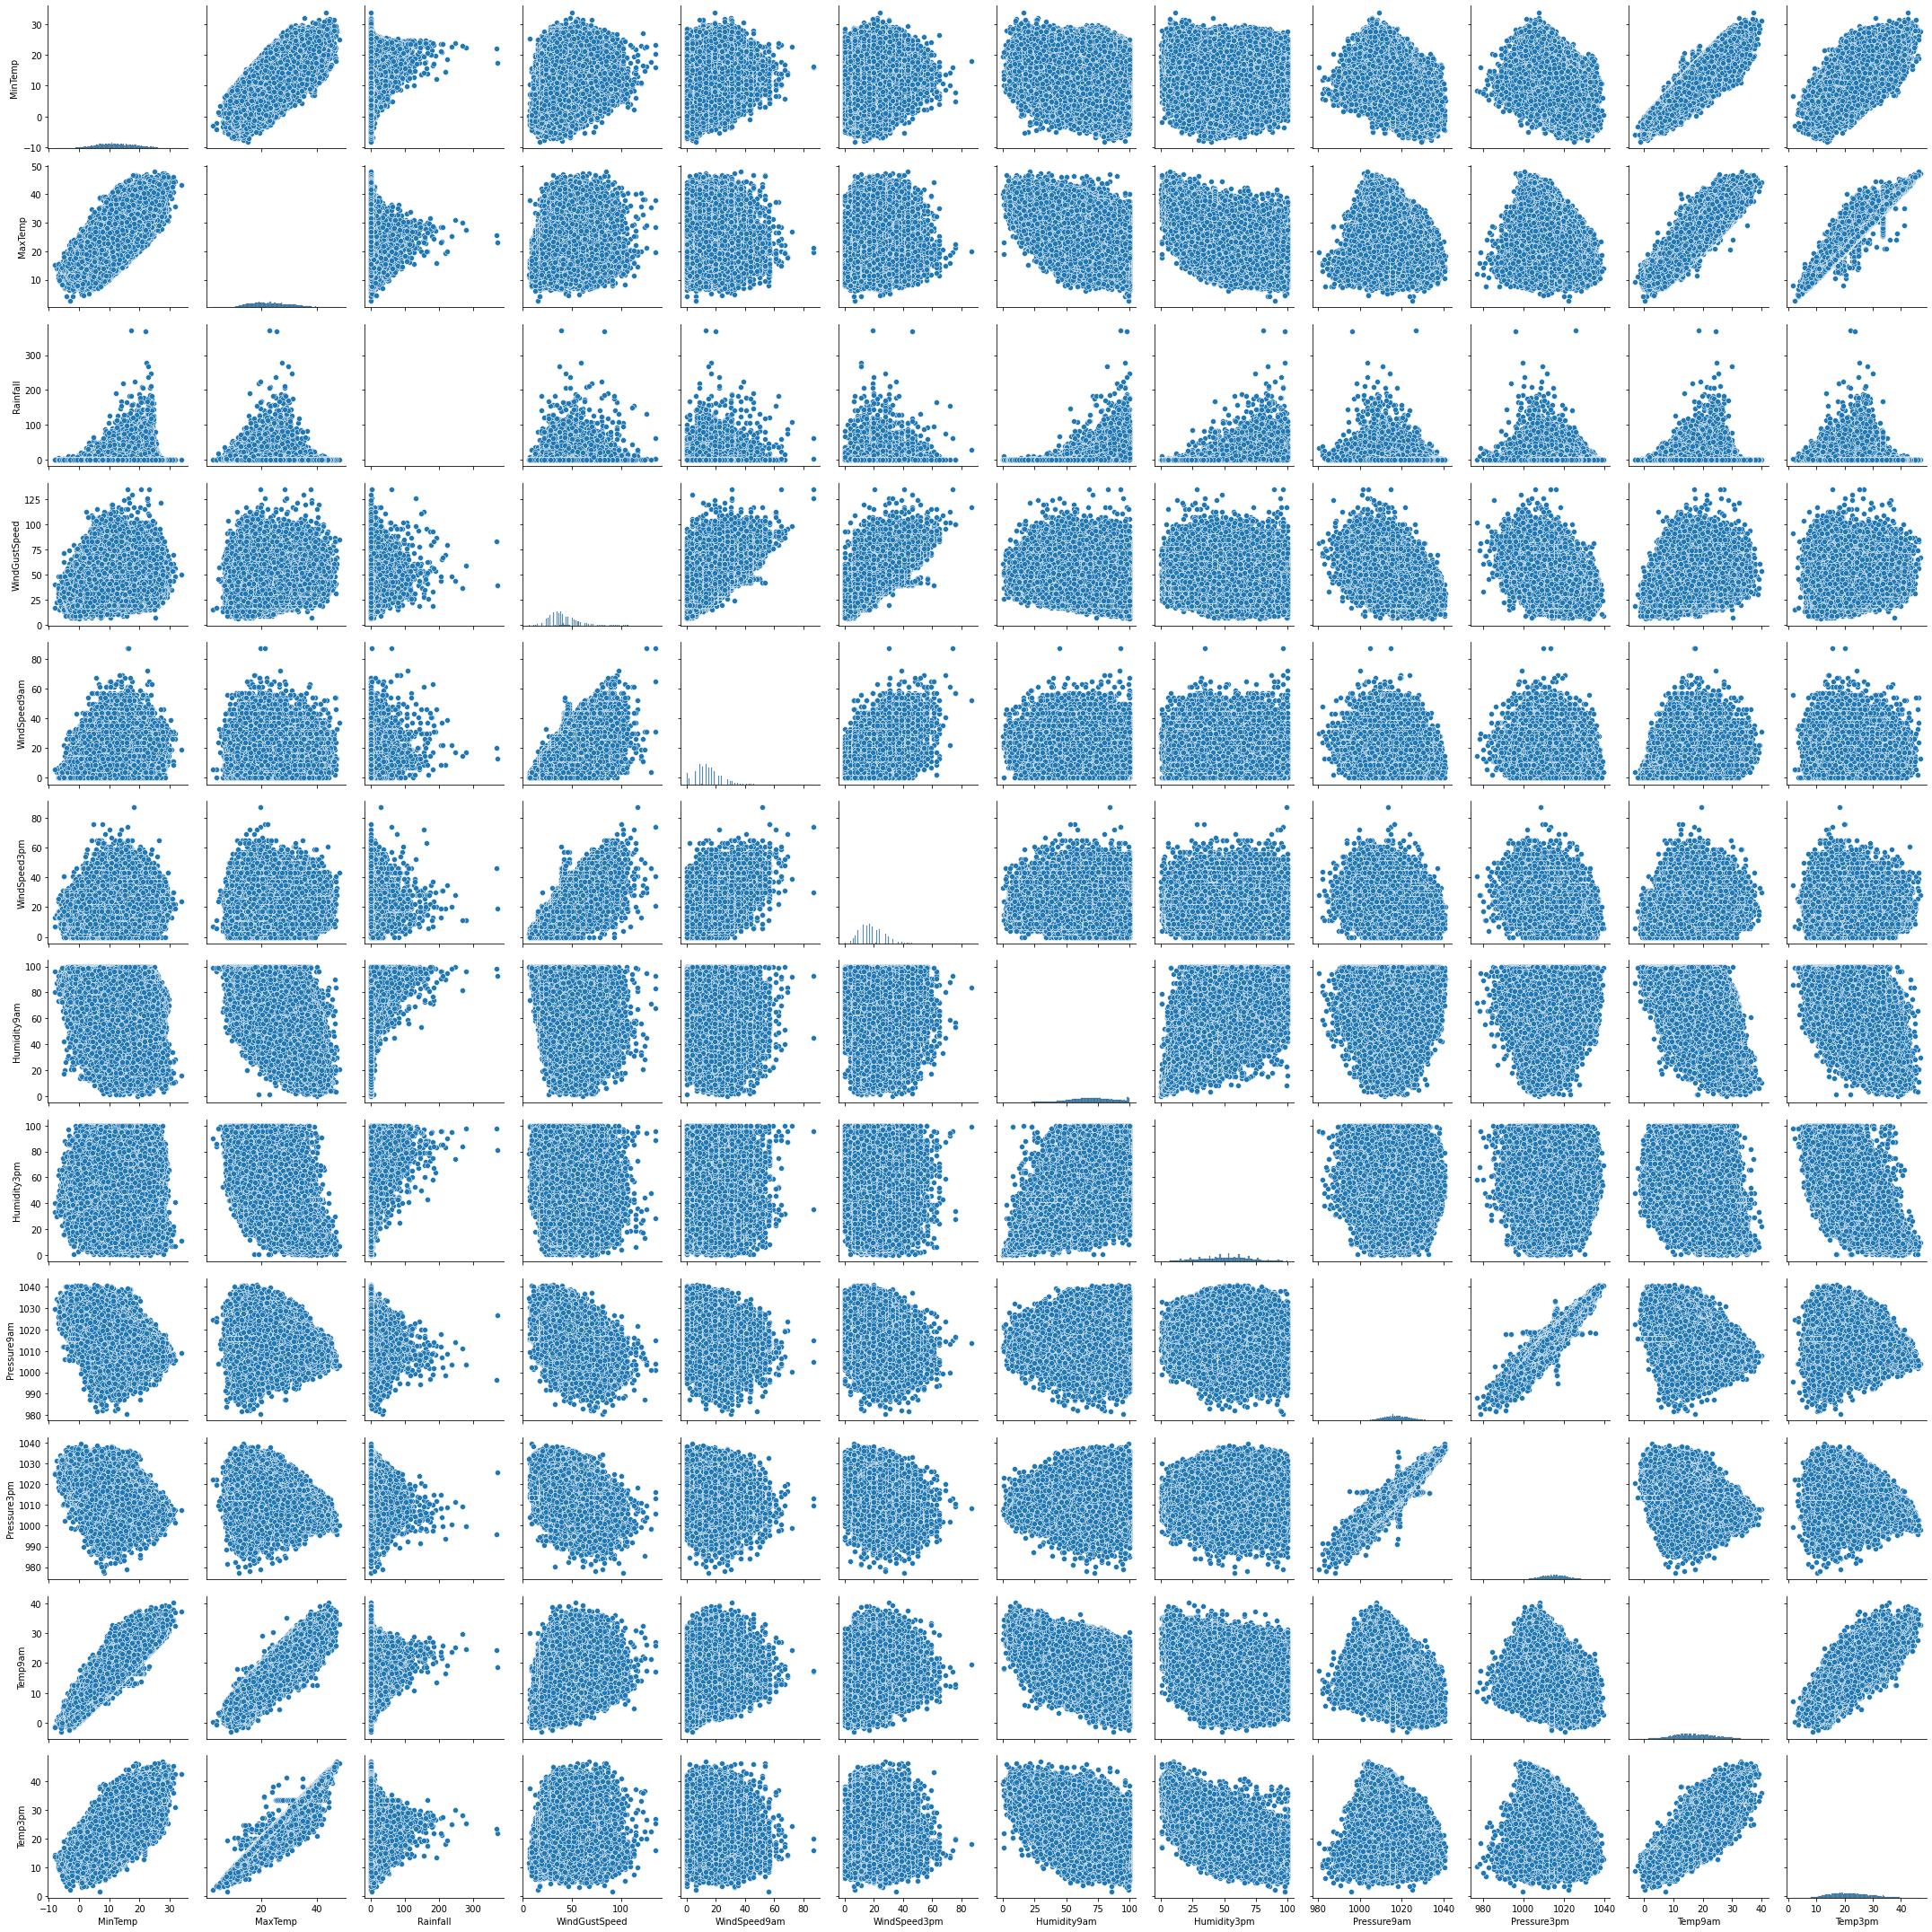

In [ ]:
# First we plot the scatter plot for each pair of columns, for observing if there are specific correlation between some columns

sns.pairplot(df_num_filled, size =2.5)
plt.tight_layout ()
plt.show()

In [ ]:
# calculate the correlation matrix
corr = df_num_filled.corr()

# plot the correlation matrix (but only half matrix)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

We noticed that there is an high correlation between Temp3pm and MaxTemp and between Pressure3pm and Pressume9am, so we'll drop Temp9am, Temp3pm and Pressure9am features:

In [ ]:
df_num_filled.drop('Temp9am', axis = 1, inplace = True)
df_num_filled.drop('Temp3pm', axis = 1, inplace = True)
df_num_filled.drop('Pressure9am', axis = 1, inplace = True)

numerical_col.remove('Temp9am')
numerical_col.remove('Temp3pm')
numerical_col.remove('Pressure9am')

In [ ]:
df_num_filled.reset_index(drop=True, inplace=True)
df_num_filled

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0          13.4     22.9       0.6           44.0          20.0          24.0   
1           7.4     25.1       0.0           44.0           4.0          22.0   
2          12.9     25.7       0.0           46.0          19.0          26.0   
3           9.2     28.0       0.0           24.0          11.0           9.0   
4          17.5     32.3       1.0           41.0           7.0          20.0   
...         ...      ...       ...            ...           ...           ...   
127391      3.5     21.8       0.0           31.0          15.0          13.0   
127392      2.8     23.4       0.0           31.0          13.0          11.0   
127393      3.6     25.3       0.0           22.0          13.0           9.0   
127394      5.4     26.9       0.0           37.0           9.0           9.0   
127395      7.8     27.0       0.0           28.0          13.0           7.0   

        Humidity9am  Humidity3pm  Pressure3pm  
0              71.0         22.0       1007.1  
1              44.0         25.0       1007.8  
2              38.0         30.0       1008.7  
3              45.0         16.0       1012.8  
4              82.0         33.0       1006.0  
...             ...          ...          ...  
127391         59.0         27.0       1021.2  
127392         51.0         24.0       1020.3  
127393         56.0         21.0       1019.1  
127394         53.0         24.0       1016.8  
127395         51.0         24.0       1016.5  

[127396 rows x 9 columns]

In [ ]:
# saving the dataset for later use
df_num_filled.to_csv("gdrive/MyDrive/mlxp/df_num.csv", index=False)

#### Categorical variables

Now we switch focus to the categorical variables, which also contain some NaN values that we need to impute

In [ ]:
s = df.dtypes == 'object'
categorical_col = []
for index in range(len(s)):
  if s[index] == True:
    categorical_col.append(columns[index])
categorical_col

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [ ]:
df[categorical_col]

Date Location WindGustDir WindDir9am WindDir3pm RainToday  \
0       2008-12-01   Albury           W          W        WNW        No   
1       2008-12-02   Albury         WNW        NNW        WSW        No   
2       2008-12-03   Albury         WSW          W        WSW        No   
3       2008-12-04   Albury          NE         SE          E        No   
4       2008-12-05   Albury           W        ENE         NW        No   
...            ...      ...         ...        ...        ...       ...   
127391  2017-06-20    Uluru           E        ESE          E        No   
127392  2017-06-21    Uluru           E         SE        ENE        No   
127393  2017-06-22    Uluru         NNW         SE          N        No   
127394  2017-06-23    Uluru           N         SE        WNW        No   
127395  2017-06-24    Uluru          SE        SSE          N        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
127391           No  
127392           No  
127393           No  
127394           No  
127395           No  

[127396 rows x 7 columns]

In [ ]:
# let's see how many missing values are present
df[categorical_col].isnull().sum()

Date               0
Location           0
WindGustDir     3114
WindDir9am      7621
WindDir3pm      1488
RainToday       1202
RainTomorrow       0
dtype: int64

In [ ]:
# this code is to make sure there is no location 
# with all null values of a categorical feature
df_loc = df[categorical_col].groupby(["Location"])
df_loc.any().sum()

Date            44
WindGustDir     44
WindDir9am      44
WindDir3pm      44
RainToday       44
RainTomorrow    44
dtype: int64

We decide to substitue these NaN values with the Mode of that column based on the specific city as before.

In [ ]:
categorical_col

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [ ]:
# imputation based on most frequent categorical value grouped by Location
df_cat = df[categorical_col]
categorical_col.remove('Location')
categorical_col.remove("Date")

df_cat_filled = pd.DataFrame(columns = categorical_col)

imr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

for location in df.Location.unique():
  cat = df_cat[df_cat.Location == location] #we want to impute the mean referring to the location.
  cat.drop('Location', axis = 1, inplace = True)
  cat.drop('Date', axis = 1, inplace = True)

  imr = imr.fit(cat.values)
  cat = imr.transform(cat.values)

  cat = pd.DataFrame(cat, columns = categorical_col)

  df_cat_filled = pd.concat([df_cat_filled, cat])

df_cat_filled.reset_index(drop=True, inplace=True)
df_cat_filled.isnull().sum()

WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [ ]:
df_cat_filled

WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow
0                W          W        WNW        No           No
1              WNW        NNW        WSW        No           No
2              WSW          W        WSW        No           No
3               NE         SE          E        No           No
4                W        ENE         NW        No           No
...            ...        ...        ...       ...          ...
127391           E        ESE          E        No           No
127392           E         SE        ENE        No           No
127393         NNW         SE          N        No           No
127394           N         SE        WNW        No           No
127395          SE        SSE          N        No           No

[127396 rows x 5 columns]

#### Building the final filled dataset

The datasets we have so far:

In [ ]:
# dataset of categorical features filled by imputation
df_cat_filled

WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow
0                W          W        WNW        No           No
1              WNW        NNW        WSW        No           No
2              WSW          W        WSW        No           No
3               NE         SE          E        No           No
4                W        ENE         NW        No           No
...            ...        ...        ...       ...          ...
127391           E        ESE          E        No           No
127392           E         SE        ENE        No           No
127393         NNW         SE          N        No           No
127394           N         SE        WNW        No           No
127395          SE        SSE          N        No           No

[127396 rows x 5 columns]

In [ ]:
# this dataset contains all the numerical variable filled by imputation
df_num_filled

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0          13.4     22.9       0.6           44.0          20.0          24.0   
1           7.4     25.1       0.0           44.0           4.0          22.0   
2          12.9     25.7       0.0           46.0          19.0          26.0   
3           9.2     28.0       0.0           24.0          11.0           9.0   
4          17.5     32.3       1.0           41.0           7.0          20.0   
...         ...      ...       ...            ...           ...           ...   
127391      3.5     21.8       0.0           31.0          15.0          13.0   
127392      2.8     23.4       0.0           31.0          13.0          11.0   
127393      3.6     25.3       0.0           22.0          13.0           9.0   
127394      5.4     26.9       0.0           37.0           9.0           9.0   
127395      7.8     27.0       0.0           28.0          13.0           7.0   

        Humidity9am  Humidity3pm  Pressure3pm  
0              71.0         22.0       1007.1  
1              44.0         25.0       1007.8  
2              38.0         30.0       1008.7  
3              45.0         16.0       1012.8  
4              82.0         33.0       1006.0  
...             ...          ...          ...  
127391         59.0         27.0       1021.2  
127392         51.0         24.0       1020.3  
127393         56.0         21.0       1019.1  
127394         53.0         24.0       1016.8  
127395         51.0         24.0       1016.5  

[127396 rows x 9 columns]

In [ ]:
# from the original df we can take the two columns that refer to
# date and location of instances, which we'll use the merge together
# all the parts of our new dataset
date_location = df[["Date","Location"]]
date_location

Date Location
0       2008-12-01   Albury
1       2008-12-02   Albury
2       2008-12-03   Albury
3       2008-12-04   Albury
4       2008-12-05   Albury
...            ...      ...
127391  2017-06-20    Uluru
127392  2017-06-21    Uluru
127393  2017-06-22    Uluru
127394  2017-06-23    Uluru
127395  2017-06-24    Uluru

[127396 rows x 2 columns]

Because we never got rid of each instance's index value, we can merge together all the columns from different datasets while maintaining the features on the same original row:

In [ ]:
# we create the final dataset
df_filled = pd.concat([date_location, df_num_filled], axis=1)
#df_filled.drop(columns="key_0", inplace=True)

df_filled = pd.concat([df_filled, df_cat_filled], axis=1)
#df_filled.drop(columns="key_0", inplace=True)

df_filled

Date Location  MinTemp  MaxTemp  Rainfall  WindGustSpeed  \
0       2008-12-01   Albury     13.4     22.9       0.6           44.0   
1       2008-12-02   Albury      7.4     25.1       0.0           44.0   
2       2008-12-03   Albury     12.9     25.7       0.0           46.0   
3       2008-12-04   Albury      9.2     28.0       0.0           24.0   
4       2008-12-05   Albury     17.5     32.3       1.0           41.0   
...            ...      ...      ...      ...       ...            ...   
127391  2017-06-20    Uluru      3.5     21.8       0.0           31.0   
127392  2017-06-21    Uluru      2.8     23.4       0.0           31.0   
127393  2017-06-22    Uluru      3.6     25.3       0.0           22.0   
127394  2017-06-23    Uluru      5.4     26.9       0.0           37.0   
127395  2017-06-24    Uluru      7.8     27.0       0.0           28.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure3pm  \
0               20.0          24.0         71.0         22.0       1007.1   
1                4.0          22.0         44.0         25.0       1007.8   
2               19.0          26.0         38.0         30.0       1008.7   
3               11.0           9.0         45.0         16.0       1012.8   
4                7.0          20.0         82.0         33.0       1006.0   
...              ...           ...          ...          ...          ...   
127391          15.0          13.0         59.0         27.0       1021.2   
127392          13.0          11.0         51.0         24.0       1020.3   
127393          13.0           9.0         56.0         21.0       1019.1   
127394           9.0           9.0         53.0         24.0       1016.8   
127395          13.0           7.0         51.0         24.0       1016.5   

       WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow  
0                W          W        WNW        No           No  
1              WNW        NNW        WSW        No           No  
2              WSW          W        WSW        No           No  
3               NE         SE          E        No           No  
4                W        ENE         NW        No           No  
...            ...        ...        ...       ...          ...  
127391           E        ESE          E        No           No  
127392           E         SE        ENE        No           No  
127393         NNW         SE          N        No           No  
127394           N         SE        WNW        No           No  
127395          SE        SSE          N        No           No  

[127396 rows x 16 columns]

In [ ]:
# check if there are nans in the final dataset
df_filled.isnull().sum()


Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure3pm      0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
# saving the filled dataset
df_filled.to_csv("gdrive/MyDrive/mlxp/df_filled.csv", index=False)

### **Categorical data encoding**

Now that we filled all missing values, we can proceed encoding all categorical features in OneHot format, in order to process them with any machine learning model.

In [ ]:
# first we map the RainTomorrow (target) feature to {0,1}
from sklearn.preprocessing import LabelEncoder

df_final = pd.read_csv("gdrive/MyDrive/mlxp/df_filled.csv")
le = LabelEncoder()
y = le.fit_transform(df_final[["RainTomorrow"]].values)
df_final["RainTomorrow"] = y
df_final["RainTomorrow"].value_counts()

0    99038
1    28358
Name: RainTomorrow, dtype: int64

In [ ]:
# the same mapping is applied to RainToday
le = LabelEncoder()
y = le.fit_transform(df_final[["RainToday"]].values)
df_final["RainToday"] = y
df_final["RainToday"].value_counts()

0    99386
1    28010
Name: RainToday, dtype: int64

In [ ]:
# save the two binary encoded variables in a separate dataframe
df_final[["RainToday", "RainTomorrow"]].to_csv("gdrive/MyDrive/mlxp/df_binaries.csv", index=False)

In [ ]:
# encode the three remaining categorical variables in OneHot format
wind_dummy = pd.get_dummies(df_cat_filled[["WindGustDir", "WindDir9am", "WindDir3pm"]], drop_first=True)
wind_dummy

WindGustDir_ENE  WindGustDir_ESE  WindGustDir_N  WindGustDir_NE  \
0                     0                0              0               0   
1                     0                0              0               0   
2                     0                0              0               0   
3                     0                0              0               1   
4                     0                0              0               0   
...                 ...              ...            ...             ...   
127391                0                0              0               0   
127392                0                0              0               0   
127393                0                0              0               0   
127394                0                0              1               0   
127395                0                0              0               0   

        WindGustDir_NNE  WindGustDir_NNW  WindGustDir_NW  WindGustDir_S  \
0                     0                0               0              0   
1                     0                0               0              0   
2                     0                0               0              0   
3                     0                0               0              0   
4                     0                0               0              0   
...                 ...              ...             ...            ...   
127391                0                0               0              0   
127392                0                0               0              0   
127393                0                1               0              0   
127394                0                0               0              0   
127395                0                0               0              0   

        WindGustDir_SE  WindGustDir_SSE  ...  WindDir3pm_NNW  WindDir3pm_NW  \
0                    0                0  ...               0              0   
1                    0                0  ...               0              0   
2                    0                0  ...               0              0   
3                    0                0  ...               0              0   
4                    0                0  ...               0              1   
...                ...              ...  ...             ...            ...   
127391               0                0  ...               0              0   
127392               0                0  ...               0              0   
127393               0                0  ...               0              0   
127394               0                0  ...               0              0   
127395               1                0  ...               0              0   

        WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  \
0                  0              0               0               0   
1                  0              0               0               0   
2                  0              0               0               0   
3                  0              0               0               0   
4                  0              0               0               0   
...              ...            ...             ...             ...   
127391             0              0               0               0   
127392             0              0               0               0   
127393             0              0               0               0   
127394             0              0               0               0   
127395             0              0               0               0   

        WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  
0                   0             0               1               0  
1                   0             0               0               1  
2                   0             0               0               1  
3                   0             0               0               0  
4                   0             0               0   

In [ ]:
# save the dummy variables about the wind direction in a dataframe
wind_dummy.to_csv("gdrive/MyDrive/mlxp/wind_dummy.csv", index=False)

### **Datetime Handling**

Now we need to extrapolate information from the date of the row; the most useful tradeoff between explanation and computation is to consider only the month of the year as valuable feature:

In [ ]:
# extract the month of the year from the string date

temp = pd.read_csv("gdrive/MyDrive/mlxp/df_filled.csv")
df_date = temp[["Date"]]
months = []
for date in df_date["Date"]:
  month = int(date.split(sep="-")[1])
  months.append(month)

# substitute all the new values
df_date["Date"] = months
df_date.rename(columns={"Date": "Month"}, inplace=True)
df_date

Month
0          12
1          12
2          12
3          12
4          12
...       ...
127391      6
127392      6
127393      6
127394      6
127395      6

[127396 rows x 1 columns]

Now we have to encode the month column with One-Hot-Encode.

In [ ]:
month_dummy = pd.get_dummies(df_date["Month"].astype('str'), drop_first=True)

# substitute the integers with corresponding month of the year
month_dict = {"1":"January", "2":"February", "3":"March", "4":"April", 
                "5":"May", "6":"June", "7":"July", "8":"August", 
                "9":"September", "10":"October", "11":"November", "12":"December"}

# rename the column from "Date" to "Month"
month_dummy.rename(columns=month_dict, inplace=True)
month_dummy

October  November  December  February  March  April  May  June  July  \
0             0         0         1         0      0      0    0     0     0   
1             0         0         1         0      0      0    0     0     0   
2             0         0         1         0      0      0    0     0     0   
3             0         0         1         0      0      0    0     0     0   
4             0         0         1         0      0      0    0     0     0   
...         ...       ...       ...       ...    ...    ...  ...   ...   ...   
127391        0         0         0         0      0      0    0     1     0   
127392        0         0         0         0      0      0    0     1     0   
127393        0         0         0         0      0      0    0     1     0   
127394        0         0         0         0      0      0    0     1     0   
127395        0         0         0         0      0      0    0     1     0   

        August  September  
0            0          0  
1            0          0  
2            0          0  
3            0          0  
4            0          0  
...        ...        ...  
127391       0          0  
127392       0          0  
127393       0          0  
127394       0          0  
127395       0          0  

[127396 rows x 11 columns]

In [ ]:
# save the month_dummy dataframe
month_dummy.to_csv("gdrive/MyDrive/mlxp/month_dummy.csv", index=False)

### **Location handling**

The last categorical feature we need to encode is the Location column, this can be done similarly to all precedent features

In [ ]:
temp = pd.read_csv("gdrive/MyDrive/mlxp/df_filled.csv")
df_location = temp[["Location"]]
location_dummy = pd.get_dummies(df_location["Location"].astype('str'), drop_first=True)
location_dummy

Albury  AliceSprings  BadgerysCreek  Ballarat  Bendigo  Brisbane  \
0            1             0              0         0        0         0   
1            1             0              0         0        0         0   
2            1             0              0         0        0         0   
3            1             0              0         0        0         0   
4            1             0              0         0        0         0   
...        ...           ...            ...       ...      ...       ...   
127391       0             0              0         0        0         0   
127392       0             0              0         0        0         0   
127393       0             0              0         0        0         0   
127394       0             0              0         0        0         0   
127395       0             0              0         0        0         0   

        Cairns  Canberra  Cobar  CoffsHarbour  ...  Townsville  Tuggeranong  \
0            0         0      0             0  ...           0            0   
1            0         0      0             0  ...           0            0   
2            0         0      0             0  ...           0            0   
3            0         0      0             0  ...           0            0   
4            0         0      0             0  ...           0            0   
...        ...       ...    ...           ...  ...         ...          ...   
127391       0         0      0             0  ...           0            0   
127392       0         0      0             0  ...           0            0   
127393       0         0      0             0  ...           0            0   
127394       0         0      0             0  ...           0            0   
127395       0         0      0             0  ...           0            0   

        Uluru  WaggaWagga  Walpole  Watsonia  Williamtown  Witchcliffe  \
0           0           0        0         0            0            0   
1           0           0        0         0            0            0   
2           0           0        0         0            0            0   
3           0           0        0         0            0            0   
4           0           0        0         0            0            0   
...       ...         ...      ...       ...          ...          ...   
127391      1           0        0         0            0            0   
127392      1           0        0         0            0            0   
127393      1           0        0         0            0            0   
127394      1           0        0         0            0            0   
127395      1           0        0         0            0            0   

        Wollongong  Woomera  
0                0        0  
1                0        0  
2                0        0  
3                0        0  
4                0        0  
...            ...      ...  
127391           0        0  
127392           0        0  
127393           0        0  
127394           0        0  
127395           0        0  

[127396 rows x 43 columns]

In [ ]:
# save the dataframe
location_dummy.to_csv("gdrive/MyDrive/mlxp/location_dummy.csv", index=False)

### **Sliding windows**

Because we are basically working on a time series, we can extrapolate some information about the past and use it to better predict thefuture.

For example, the average value of pressure in the last three days could be an added clue to whether tomorrow will be a rainy day.

This information is collected by creating as many new columns as there are numerical features in the dataset, each one containing the average value for the corresponding feature in the last (say) 3 days.

In [ ]:
# Adds the rolling average and rolling standard deviation using fixed rolling window size
def add_numerical_features(df_in, rolling_win_size):
    
    s_columns = df_in.columns
    s_columns = s_columns.delete(0)
    s_av_columns = []
    s_sd_columns = []
    for column_name in s_columns:
      s_av_columns.append("avg" + column_name)
      s_sd_columns.append("sd" + column_name)

    df_out = pd.DataFrame(columns=s_columns)
    
    # ws is the window time period to calculate the extra features
    ws = rolling_win_size
    
    #calculate rolling stats for each location
    for location in pd.unique(df_in.Location):
    
        # get a subset for each location
        df_rolling = df_in[df_in['Location'] == location]
        df_sub = df_rolling[s_columns]

        # get rolling mean for the subset
        av = df_sub.rolling(ws, min_periods=1).mean()
        av.columns = s_av_columns
    
        # get the rolling standard deviation for the subset
        sd = df_sub.rolling(ws, min_periods=1).std().fillna(0)
        sd.columns = s_sd_columns
    
        # combine the two new subset dataframes columns to the location subset
        # new_ftrs = pd.concat([df_sub,av,sd], axis=1)

        # use this is you don't want to add the standard deviation column
        new_ftrs = pd.concat([df_sub,av], axis=1)
    
        # add the new features rows to the output dataframe
        df_out = pd.concat([df_out,new_ftrs])
        
    return df_out

In [ ]:
numerical_col = [x for x in pd.read_csv("gdrive/MyDrive/mlxp/df_num.csv").columns]
numerical_col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure3pm']

In [ ]:
# now let's build the numerical dataset with rolling averages of size 3

temp = pd.read_csv("gdrive/MyDrive/mlxp/df_filled.csv")
df_in = temp[["Location"]+numerical_col]
df_num_rolling = add_numerical_features(df_in, 3)
df_num_rolling

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0          13.4     22.9       0.6           44.0          20.0          24.0   
1           7.4     25.1       0.0           44.0           4.0          22.0   
2          12.9     25.7       0.0           46.0          19.0          26.0   
3           9.2     28.0       0.0           24.0          11.0           9.0   
4          17.5     32.3       1.0           41.0           7.0          20.0   
...         ...      ...       ...            ...           ...           ...   
127391      3.5     21.8       0.0           31.0          15.0          13.0   
127392      2.8     23.4       0.0           31.0          13.0          11.0   
127393      3.6     25.3       0.0           22.0          13.0           9.0   
127394      5.4     26.9       0.0           37.0           9.0           9.0   
127395      7.8     27.0       0.0           28.0          13.0           7.0   

        Humidity9am  Humidity3pm  Pressure3pm  avgMinTemp  avgMaxTemp  \
0              71.0         22.0       1007.1   13.400000   22.900000   
1              44.0         25.0       1007.8   10.400000   24.000000   
2              38.0         30.0       1008.7   11.233333   24.566667   
3              45.0         16.0       1012.8    9.833333   26.266667   
4              82.0         33.0       1006.0   13.200000   28.666667   
...             ...          ...          ...         ...         ...   
127391         59.0         27.0       1021.2    6.300000   21.033333   
127392         51.0         24.0       1020.3    4.566667   21.933333   
127393         56.0         21.0       1019.1    3.300000   23.500000   
127394         53.0         24.0       1016.8    3.933333   25.200000   
127395         51.0         24.0       1016.5    5.600000   26.400000   

        avgRainfall  avgWindGustSpeed  avgWindSpeed9am  avgWindSpeed3pm  \
0          0.600000         44.000000        20.000000        24.000000   
1          0.300000         44.000000        12.000000        23.000000   
2          0.200000         44.666667        14.333333        24.000000   
3          0.000000         38.000000        11.333333        19.000000   
4          0.333333         37.000000        12.333333        18.333333   
...             ...               ...              ...              ...   
127391     0.000000         35.666667        16.333333        18.666667   
127392     0.000000         32.333333        14.333333        13.666667   
127393     0.000000         28.000000        13.666667        11.000000   
127394     0.000000         30.000000        11.666667         9.666667   
127395     0.000000         29.000000        11.666667         8.333333   

        avgHumidity9am  avgHumidity3pm  avgPressure3pm  
0            71.000000       22.000000     1007.100000  
1            57.500000       23.500000     1007.450000  
2            51.000000       25.666667     1007.866667  
3            42.333333       23.666667     1009.766667  
4            55.000000       26.333333     1009.166667  
...                ...             ...             ...  
127391       59.333333       30.666667     1022.933333  
127392       57.666667       28.000000     1021.600000  
127393       55.333333       24.000000     1020.200000  
127394       53.333333       23.000000     1018.733333  
127395       53.333333       23.000000     1017.466667  

[127396 rows x 18 columns]

In [ ]:
# saving the dataframe
df_num_rolling.to_csv("gdrive/MyDrive/mlxp/df_num_rolling.csv", index=False)

### **Dataset Builder**

Now that we have all elemental components, we can create a dataset from any of their combinations; for this we define a function that builds datasets:

In [ ]:
def dataset_builder(datasets_list):
  df_out = pd.concat([datasets_list[0], datasets_list[1]], axis=1)
  for i in range(len(datasets_list) - 2):
    df_out = pd.concat([df_out, datasets_list[i+2]], axis=1)
  return df_out

In [ ]:
df_binaries = pd.read_csv("gdrive/MyDrive/mlxp/df_binaries.csv")
df_num_rolling = pd.read_csv("gdrive/MyDrive/mlxp/df_num_rolling.csv")
location_dummy = pd.read_csv("gdrive/MyDrive/mlxp/location_dummy.csv")
month_dummy = pd.read_csv("gdrive/MyDrive/mlxp/month_dummy.csv")
wind_dummy = pd.read_csv("gdrive/MyDrive/mlxp/wind_dummy.csv")

datasets_list = [location_dummy, month_dummy, wind_dummy, df_num_rolling, df_binaries]

df_all = dataset_builder(datasets_list)
df_all

Albury  AliceSprings  BadgerysCreek  Ballarat  Bendigo  Brisbane  \
0            1             0              0         0        0         0   
1            1             0              0         0        0         0   
2            1             0              0         0        0         0   
3            1             0              0         0        0         0   
4            1             0              0         0        0         0   
...        ...           ...            ...       ...      ...       ...   
127391       0             0              0         0        0         0   
127392       0             0              0         0        0         0   
127393       0             0              0         0        0         0   
127394       0             0              0         0        0         0   
127395       0             0              0         0        0         0   

        Cairns  Canberra  Cobar  CoffsHarbour  ...  avgMaxTemp  avgRainfall  \
0            0         0      0             0  ...   22.900000     0.600000   
1            0         0      0             0  ...   24.000000     0.300000   
2            0         0      0             0  ...   24.566667     0.200000   
3            0         0      0             0  ...   26.266667     0.000000   
4            0         0      0             0  ...   28.666667     0.333333   
...        ...       ...    ...           ...  ...         ...          ...   
127391       0         0      0             0  ...   21.033333     0.000000   
127392       0         0      0             0  ...   21.933333     0.000000   
127393       0         0      0             0  ...   23.500000     0.000000   
127394       0         0      0             0  ...   25.200000     0.000000   
127395       0         0      0             0  ...   26.400000     0.000000   

        avgWindGustSpeed  avgWindSpeed9am  avgWindSpeed3pm  avgHumidity9am  \
0              44.000000        20.000000        24.000000       71.000000   
1              44.000000        12.000000        23.000000       57.500000   
2              44.666667        14.333333        24.000000       51.000000   
3              38.000000        11.333333        19.000000       42.333333   
4              37.000000        12.333333        18.333333       55.000000   
...                  ...              ...              ...             ...   
127391         35.666667        16.333333        18.666667       59.333333   
127392         32.333333        14.333333        13.666667       57.666667   
127393         28.000000        13.666667        11.000000       55.333333   
127394         30.000000        11.666667         9.666667       53.333333   
127395         29.000000        11.666667         8.333333       53.333333   

        avgHumidity3pm  avgPressure3pm  RainToday  RainTomorrow  
0            22.000000     1007.100000          0             0  
1            23.500000     1007.450000          0             0  
2            25.666667     1007.866667          0             0  
3            23.666667     1009.766667          0             0  
4            26.333333     1009.166667          0             0  
...                ...             ...        ...           ...  
127391       30.666667     1022.933333          0             0  
127392       28.000000     1021.600000          0             0  
127393       24.000000     1020.200000          0             0  
127394       23.000000     1018.733333          0             0  
127395       23.000000     1017.466667          0             0  

[127396 rows x 119 columns]

In [ ]:
# check if there are still categorical variables
s = df_all.dtypes == 'object'
catcol = []
for index in range(len(s)):
  if s[index] == True:
    catcol.append(columns[index])
catcol

[]

In [ ]:
# save the dataframe
df_all.to_csv("gdrive/MyDrive/mlxp/df_all.csv", index=False)

### **Dataset Selection**

The following is an example of how to create datasets in order to run feature selection/extraction/classification algorithms

In [ ]:
df_num_rolling = pd.read_csv("gdrive/MyDrive/mlxp/df_num_rolling.csv")
df_binaries = pd.read_csv("gdrive/MyDrive/mlxp/df_binaries.csv")

X = df_num_rolling
columns = [x for x in X.columns]

y = df_binaries[["RainTomorrow"]]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1,stratify=y) #80% train, 20%test

### **Feature selection**

We want to automatically select a subset of features that are most relevant to the problem. (we will occasionally leave in the categorical encoded variables for simplicity even though they should be explored separately)

#### **Variance Threshold Selection**
Let's see if there are any features in the df_num_rolling dataframe with a variance lower than the 0.2 threshold:

In [ ]:
sel = VarianceThreshold(threshold = 0.2)
sel.fit_transform(X_train)
print('The numerical columns are: ', columns)
print('The features to keep are', sel.get_feature_names_out(columns))

The numerical columns are:  ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'avgMinTemp', 'avgMaxTemp', 'avgRainfall', 'avgWindGustSpeed', 'avgWindSpeed9am', 'avgWindSpeed3pm', 'avgHumidity9am', 'avgHumidity3pm', 'avgPressure3pm']
The features to keep are ['MinTemp' 'MaxTemp' 'Rainfall' 'WindGustSpeed' 'WindSpeed9am'
 'WindSpeed3pm' 'Humidity9am' 'Humidity3pm' 'Pressure3pm' 'avgMinTemp'
 'avgMaxTemp' 'avgRainfall' 'avgWindGustSpeed' 'avgWindSpeed9am'
 'avgWindSpeed3pm' 'avgHumidity9am' 'avgHumidity3pm' 'avgPressure3pm']


We see that all columns pass the variance check, let's move on to a different method.

#### **Random Forest for Feature Importance**

Using a random forest, we can measure the feature importance as
the averaged impurity decrease computed from all decision trees in
the forest, without making any assumptions about whether our data
is linearly separable or not. We train a forest of 500 trees and rank the features by their respective importance measures.

Now let's see the results of the Random forest on the entire dataset. The categorical columns are a lower importance. Maybe because by using one-hot encoding, we split the information of a single column in more columns. Therefore in our opinion these results are not reliable.

In [ ]:
df_all = pd.read_csv("gdrive/MyDrive/mlxp/df_all.csv")

X = df_all.drop(columns=["RainTomorrow"])
columns = [x for x in X.columns]

y = df_all[["RainTomorrow"]]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1,stratify=y) #80% train, 20%test

In [ ]:
# Application of Random forest classifier for the feature importance

forest = RandomForestClassifier(n_estimators=500, random_state=1, class_weight="balanced_subsample")
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

In [ ]:
for f in range(X_train.shape[1]) :
    print ("%2d) %-*s %f" % (f + 1, 30, columns[indices[f]], importances[indices[f]]))

 1) Humidity3pm                    0.135521
 2) avgHumidity3pm                 0.063640
 3) Pressure3pm                    0.062360
 4) WindGustSpeed                  0.052106
 5) Rainfall                       0.048023
 6) Humidity9am                    0.047285
 7) avgHumidity9am                 0.037241
 8) avgPressure3pm                 0.037210
 9) MaxTemp                        0.036533
10) MinTemp                        0.035729
11) avgRainfall                    0.032513
12) avgMaxTemp                     0.032492
13) avgMinTemp                     0.032112
14) avgWindGustSpeed               0.030327
15) avgWindSpeed3pm                0.028119
16) avgWindSpeed9am                0.026753
17) WindSpeed3pm                   0.024421
18) RainToday                      0.023948
19) WindSpeed9am                   0.022343
20) WindDir9am_N                   0.004028
21) WindDir9am_NNE                 0.003322
22) WindDir3pm_N                   0.003321
23) WindGustDir_N               

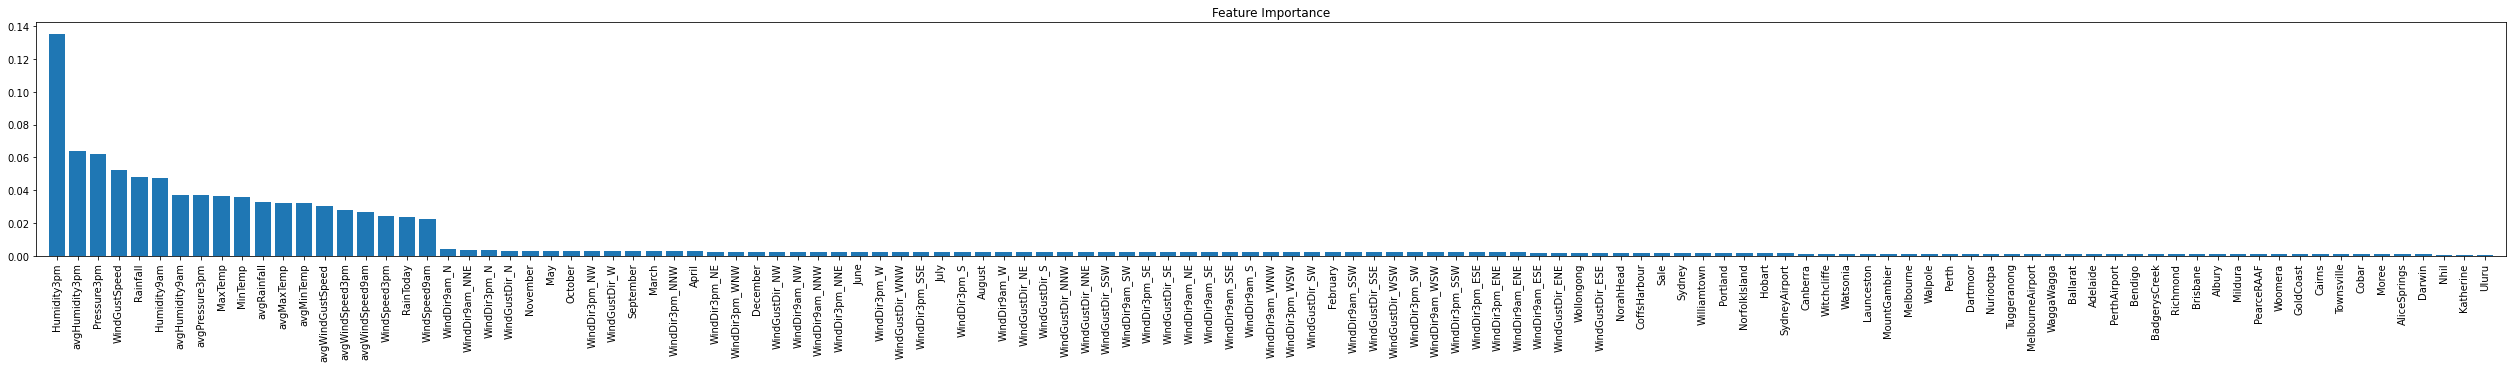

In [ ]:
# Let's visualize the results with a barplot.
rf_col = [x for _, x in sorted(zip(importances, columns), reverse=True)]

plt.figure(figsize=(35,5))
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), rf_col, rotation=90)

plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.title('Feature Importance')
plt.show()

### **Standardization**

For feature extraction, and, in general, better overall computation we will need to standardize our data, we will do it with the following:

In [ ]:
df_all = pd.read_csv("gdrive/MyDrive/mlxp/df_all.csv")
df_num_rolling = pd.read_csv("gdrive/MyDrive/mlxp/df_num_rolling.csv")

X = df_all.drop(columns=["RainTomorrow"])
columns = [x for x in X.columns]
columns_num = [x for x in df_num_rolling.columns]

y = df_all[["RainTomorrow"]]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1,stratify=y) #80% train, 20%test

In [ ]:
# standardization of train and test sets
# focusing only on the numerical features

stdsc=StandardScaler()

X_train_std = X_train
X_test_std = X_test
X_train_num_std = stdsc.fit_transform(X_train[columns_num])
X_test_num_std = stdsc.transform(X_test[columns_num])

X_train_std[columns_num] = X_train_num_std
X_test_std[columns_num] = X_test_num_std

### **Feature extraction**
Now we do some feature extraction through PCA and LDA 

#### **Principal Component Analysis**
Principal component analysis can be carried on to extract the direction of greater variance

In [ ]:
pca = PCA(n_components=None) # with n_components = None we can visulaize the variance explained by all the dimensions.
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

pca.explained_variance_ratio_*100

array([2.58906358e+01, 1.71789306e+01, 1.22286430e+01, 5.57314828e+00,
       5.23251057e+00, 3.16666074e+00, 2.53312970e+00, 1.92450350e+00,
       1.75741875e+00, 1.51320859e+00, 9.62098507e-01, 8.36835401e-01,
       6.76130588e-01, 5.44471068e-01, 4.98388798e-01, 4.75853998e-01,
       4.56897519e-01, 4.23198391e-01, 4.18419781e-01, 4.15100910e-01,
       4.01288553e-01, 3.87454697e-01, 3.78819114e-01, 3.72085741e-01,
       3.65683852e-01, 3.61488734e-01, 3.56304153e-01, 3.54316917e-01,
       3.43021966e-01, 3.40621109e-01, 3.34044643e-01, 3.29712097e-01,
       3.28667748e-01, 3.23439631e-01, 3.13344995e-01, 3.13146800e-01,
       3.06402110e-01, 3.01612575e-01, 2.97040037e-01, 2.87780318e-01,
       2.84965520e-01, 2.82652935e-01, 2.79891519e-01, 2.74433821e-01,
       2.73044475e-01, 2.66664137e-01, 2.62263541e-01, 2.58643179e-01,
       2.56306007e-01, 2.50395290e-01, 2.47335154e-01, 2.41100098e-01,
       2.39386561e-01, 2.32167472e-01, 2.29783651e-01, 2.28904106e-01,
      

In [ ]:
n_comp = 0
var = 0
while var<85:
  var+=pca.explained_variance_ratio_[n_comp]*100
  n_comp +=1


x_train_pca = X_train_pca[:,:n_comp]
x_test_pca = X_test_pca[:,:n_comp]

In [ ]:
n_comp

27

In [ ]:
np.savetxt("gdrive/MyDrive/mlxp/pca/x_train_pca.txt",x_train_pca)
np.savetxt("gdrive/MyDrive/mlxp/pca/x_test_pca.txt",x_test_pca)
np.savetxt("gdrive/MyDrive/mlxp/pca/y_train_pca.txt",y_train)
np.savetxt("gdrive/MyDrive/mlxp/pca/y_test_pca.txt",y_test)

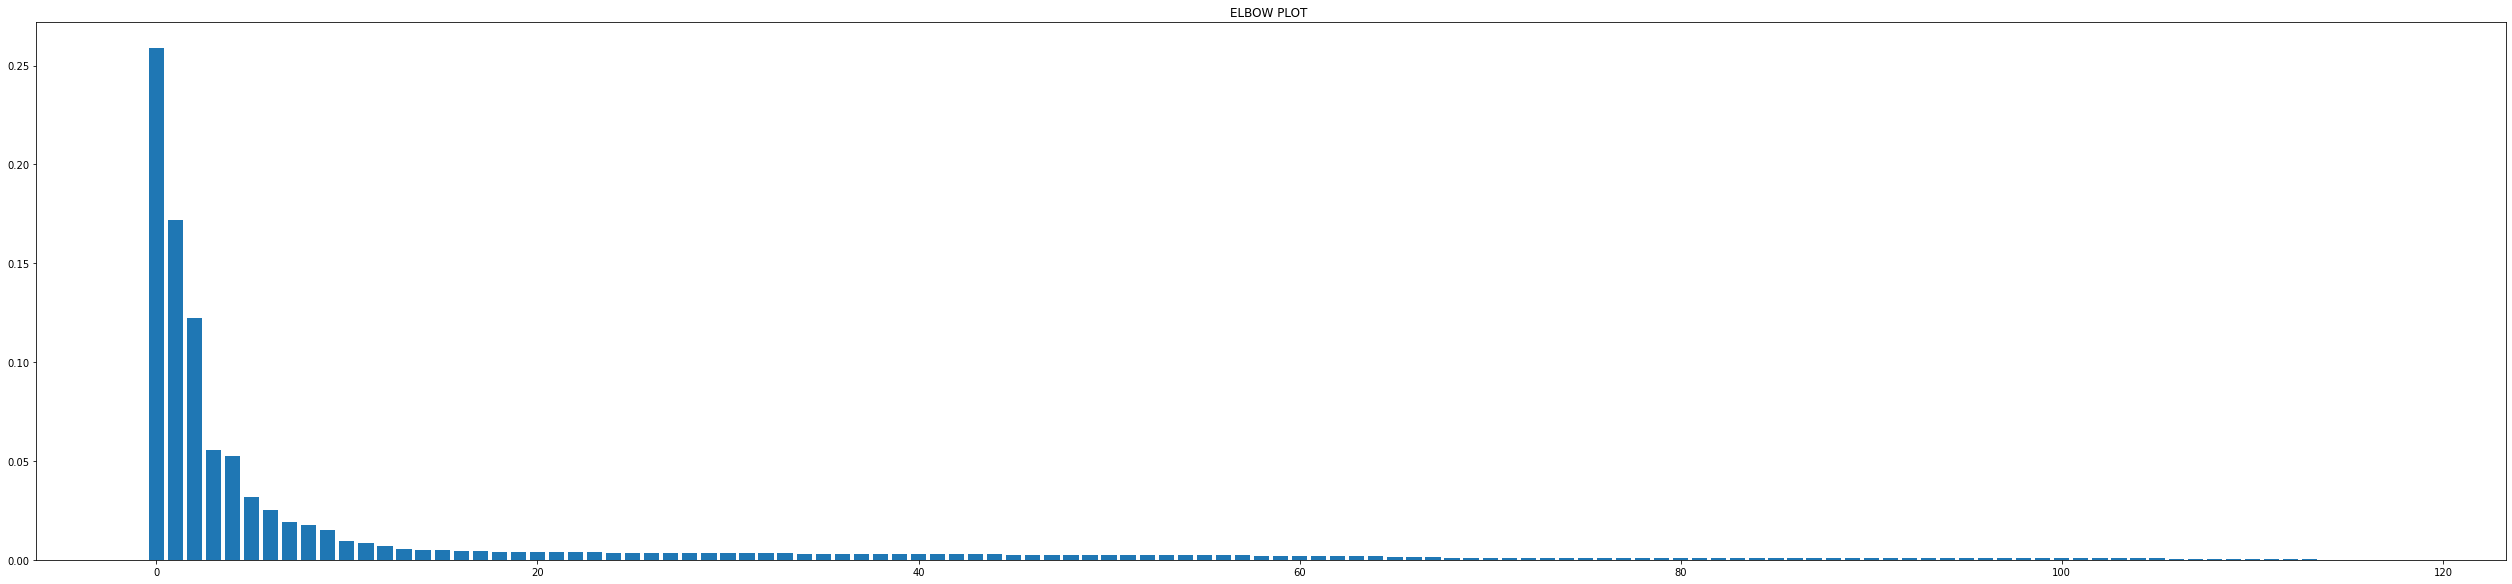

In [ ]:
# Let's visualize the elbow plot.
plt.figure(figsize=(35,8))
plt.bar(range(len( pca.explained_variance_ratio_)), height = pca.explained_variance_ratio_,align ='center')
plt.tight_layout ()
plt.title ('ELBOW PLOT ')
plt.show()

#### **Linear Discriminant Analysis**

In [ ]:
lda = LDA()
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

In [ ]:
np.savetxt("gdrive/MyDrive/mlxp/pca/x_train_lda.txt",X_train_lda)
np.savetxt("gdrive/MyDrive/mlxp/pca/x_test_lda.txt",X_test_lda)